In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50-007-machine-learning-summer-2024/sample_submission.csv
/kaggle/input/50-007-machine-learning-summer-2024/train_tfidf_features.csv
/kaggle/input/50-007-machine-learning-summer-2024/test_tfidf_features.csv
/kaggle/input/50-007-machine-learning-summer-2024/train.csv
/kaggle/input/50-007-machine-learning-summer-2024/test.csv


In [2]:
## import statements
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report


In [3]:
## datasets

train = pd.read_csv('/kaggle/input/50-007-machine-learning-summer-2024/train.csv')
test = pd.read_csv('/kaggle/input/50-007-machine-learning-summer-2024/test.csv')
train_tfidf_features = pd.read_csv('/kaggle/input/50-007-machine-learning-summer-2024/train_tfidf_features.csv')
test_tfidf_features = pd.read_csv('/kaggle/input/50-007-machine-learning-summer-2024/test_tfidf_features.csv')

In [4]:
X = train_tfidf_features.drop(columns=['label'], errors='ignore')
y = train['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
### NO TUNING ### 
# model = GaussianNB()
# model.fit(X_train, y_train)

In [6]:
### Hyperparameter Tuning Section Start ###
# Define the model
model = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Perform GridSearchCV to find the best parameters
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Print all results from the grid search
results = pd.DataFrame(grid_search.cv_results_)
print("Grid search results:")
print(results)

# Train the model with the best parameters
print("Training model with best parameters...")
model = GaussianNB(var_smoothing=best_params['var_smoothing'])

Starting GridSearchCV...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..................................var_smoothing=1.0; total time=   1.9s
[CV] END ..................................var_smoothing=1.0; total time=   1.7s
[CV] END ..................................var_smoothing=1.0; total time=   1.7s
[CV] END ..................................var_smoothing=1.0; total time=   1.7s
[CV] END ..................................var_smoothing=1.0; total time=   1.7s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   1.7s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   1.7s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   1.7s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   1.7s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   1.7s
[CV] END ....................var_smoothing=0.657933224657568; total time=   1.7s
[CV] END ............

In [7]:
model.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.66
Macro F1 Score: 0.51
              precision    recall  f1-score   support

           0       0.65      0.96      0.78      2153
           1       0.69      0.15      0.24      1284

    accuracy                           0.66      3437
   macro avg       0.67      0.55      0.51      3437
weighted avg       0.67      0.66      0.58      3437



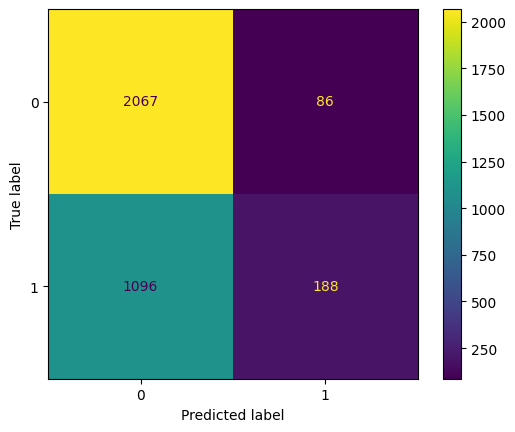

In [8]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {f1:.2f}")

print(classification_report(y_val, y_pred))

In [9]:
test_predictions = model.predict(test_tfidf_features)

In [10]:
results_df = pd.DataFrame({
    'id': test_tfidf_features.iloc[:, 0].copy(),
    'label': test_predictions
})

results_df.to_csv(f"/kaggle/working/t3_naive_bayes.csv", index=False)